In [24]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
tf.__version__

'2.4.1'

In [3]:
keras.__version__

'2.4.0'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

In [7]:
y_train_full.shape

(60000,)

In [8]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] /255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
class_names = ["Koszulka", "Spodnie", "Sweter", "Sukienka", "Płaszcz",
"Sandał", "Koszula", "Tenisówka", "Torebka", "Trzewik"]

In [10]:
class_names[y_train[2]]

'Tenisówka'

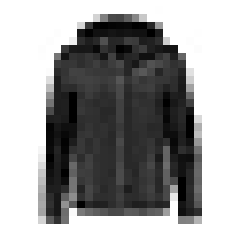

In [12]:
plt.imshow(X_train[0],cmap='binary')
plt.axis('off')
plt.show()

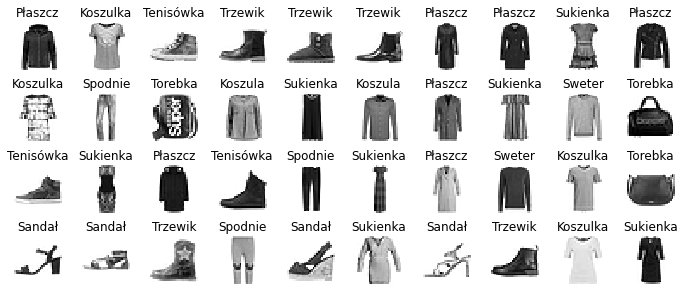

In [14]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index],cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.5)

# Building Sequential Model

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation = 'relu'))
model.add(keras.layers.Dense(100,activation = 'relu'))
model.add(keras.layers.Dense(10,activation = 'softmax'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


# Compiling sequential model

In [21]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer = 'sgd',
             metrics='accuracy')

In [23]:
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.9650 - accuracy: 0.7011 - val_loss: 0.5057 - val_accuracy: 0.8312
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.5040 - accuracy: 0.8251 - val_loss: 0.4803 - val_accuracy: 0.8350
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4494 - accuracy: 0.8443 - val_loss: 0.4241 - val_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4222 - accuracy: 0.8500 - val_loss: 0.4117 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4015 - accuracy: 0.8605 - val_loss: 0.3923 - val_accuracy: 0.8652
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3816 - accuracy: 0.8648 - val_loss: 0.3945 - val_accuracy: 0.8640
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3612 - accuracy: 0.8731 - val_loss: 0.3759 - val_accuracy:

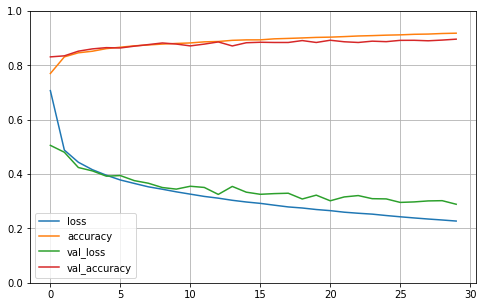

In [25]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #Wyznacza zakres osi pionowej od 0 do 1
plt.show()

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [27]:
y_pred = model.predict_classes(X_new)
y_pred

c:\users\nigor\desktop\ml\my_env\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1], dtype=int64)

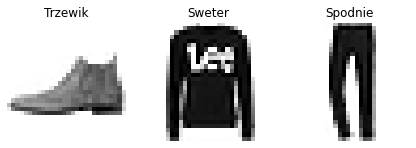

In [32]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()